In [4]:
import pandas as pd
df = pd.read_csv('maybe_final.csv')
df

,Unnamed: 0,Unnamed: 0.1,id,name,publisher,genres,platforms,franchise,aggregated_rating,aggregated_rating_count,total_rating,total_rating_count,follows,hypes,units_shipped,count_non_null,rating,rating_count
0,0,0,412,Final Fantasy: Crystal Chronicles,Nintendo,"['Role-playing (RPG)', 'Simulator', 'Strategy']",Nintendo GameCube,Final Fantasy,80.750000,5.0,74.681222,39.0,15.0,NaN,1.30m,3,68.623674,35.0
1,1,1,414,Final Fantasy Tactics Advance,Nintendo,"['Role-playing (RPG)', 'Strategy', 'Turn-based...","['Game Boy Advance', 'Wii U']",Final Fantasy,90.000000,1.0,86.039104,117.0,27.0,NaN,1.18m,3,82.072550,118.0
2,3,2,408,Final Fantasy I & II: Dawn of Souls,Nintendo,Role-playing (RPG),Game Boy Advance,Final Fantasy,50.000000,2.0,59.672277,12.0,6.0,NaN,1.40m,3,69.344555,10.0
3,4,3,385,Final Fantasy,Nintendo,"['Role-playing (RPG)', 'Adventure']","['Wii', 'Nintendo Entertainment System', 'Nint...",Final Fantasy,70.000000,1.0,73.970214,203.0,39.0,NaN,1.20m,3,77.938989,205.0
4,5,4,4601,Hogan's Alley,Nintendo,"['Shooter', 'Arcade']","['Nintendo Entertainment System', 'Wii U', 'Ar...",Hogan's Alley,NaN,NaN,59.892450,28.0,5.0,NaN,1.27m,2,59.892450,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048,1075,1238,1694,Advance Wars: Days Of Ruin,Nintendo,"['Strategy', 'Turn-based strategy (TBS)']","['Nintendo DS', 'Nintendo DSi']",NaN,84.666667,4.0,79.487247,26.0,11.0,NaN,NaN,3,79.720361,25.0
1049,1076,1239,1692,Advance Wars 2: Black Hole Rising,Nintendo,"['Strategy', 'Turn-based strategy (TBS)', 'Tac...","['Game Boy Advance', 'Wii U']",NaN,90.500000,2.0,88.172233,39.0,13.0,NaN,NaN,3,85.844467,38.0
1050,1077,1241,1691,Advance Wars,Nintendo,"['Simulator', 'Strategy', 'Turn-based strategy...","['Game Boy Advance', 'Wii U']",NaN,100.000000,1.0,91.352383,91.0,35.0,NaN,NaN,3,82.716148,94.0
1051,1078,1243,44072,Ash: Archaic Sealed Heat,Nintendo,"['Role-playing (RPG)', 'Strategy', 'Turn-based...",Nintendo DS,NaN,NaN,NaN,60.000000,0.0,1.0,NaN,NaN,2,60.000000,0.0


In [7]:
df = df.dropna(subset=['aggregated_rating', 'rating', 'total_rating'], how='all')

global_average_agg_rating = df['aggregated_rating'].mean()
global_average_rating = df['rating'].mean()
global_average_total_rating = df['total_rating'].mean()

average_agg_rating_count = df['aggregated_rating_count'].mean()
average_rating_count = df['rating_count'].mean()
average_total_rating_count = df['total_rating_count'].mean()

min_agg_rating_count = average_agg_rating_count
min_rating_count = average_rating_count
min_total_rating_count = average_total_rating_count

df['weighted_agg_rating'] = (df['aggregated_rating_count'] * df['aggregated_rating'] + min_agg_rating_count * global_average_agg_rating) / (df['aggregated_rating_count'] + min_agg_rating_count)
df['weighted_rating'] = (df['rating_count'] * df['rating'] + min_rating_count * global_average_rating) / (df['rating_count'] + min_rating_count)
df['weighted_total_rating'] = (df['total_rating_count'] * df['total_rating'] + min_total_rating_count * global_average_total_rating) / (df['total_rating_count'] + min_total_rating_count)

df.sort_values(by='weighted_total_rating', ascending=False, inplace=True)

df[['name', 'weighted_agg_rating', 'weighted_rating', 'weighted_total_rating']]


,name,weighted_agg_rating,weighted_rating,weighted_total_rating
330,Super Mario World,78.302786,91.745923,95.066205
370,The Legend of Zelda: A Link to the Past,78.302786,91.643547,94.867532
259,God of War,92.581022,93.271355,94.302553
374,Super Metroid,78.302786,91.289589,94.261953
86,The Legend of Zelda: Breath of the Wild,93.815683,91.934757,94.134210
...,...,...,...,...
319,1-2-Switch,61.703594,68.070984,66.810489
381,Sonic Lost World,62.708368,67.741212,66.592138
145,Pokémon XD: Gale of Darkness,69.909866,73.178653,66.467579
22,Mario Party 6,69.909866,69.794295,65.801491


In [12]:
def convert_to_millions(value):
    if isinstance(value, str) and 'm' in value:
        return int(float(value.replace('m', '')) * 1_000_000)
    return value

df['units_shipped'] = df['units_shipped'].apply(convert_to_millions)
df

,Unnamed: 0,Unnamed: 0.1,id,name,publisher,genres,platforms,franchise,aggregated_rating,aggregated_rating_count,...,total_rating_count,follows,hypes,units_shipped,count_non_null,rating,rating_count,weighted_agg_rating,weighted_rating,weighted_total_rating
330,340,343,1070,Super Mario World,Nintendo,"['Platform', 'Adventure']","['Wii', 'Super Nintendo Entertainment System',...",Mario Bros.,100.000000,1.0,...,1320.0,545.0,NaN,20610000.0,3,92.869452,1344.0,78.302786,91.745923,95.066205
370,381,384,1026,The Legend of Zelda: A Link to the Past,Nintendo,"['Puzzle', 'Role-playing (RPG)', 'Adventure']","['Wii', 'Super Nintendo Entertainment System',...",NaN,100.000000,1.0,...,1205.0,454.0,NaN,4610000.0,3,92.873651,1220.0,78.302786,91.643547,94.867532
259,263,271,19560,God of War,Sony Interactive Entertainment,"['Role-playing (RPG)', ""Hack and slash/Beat 'e...","['PC (Microsoft Windows)', 'PlayStation 4']",NaN,96.230769,30.0,...,1879.0,547.0,92.0,970000.0,4,94.136264,1906.0,92.581022,93.271355,94.302553
374,385,388,1103,Super Metroid,Nintendo,"['Shooter', 'Platform', 'Adventure']","['Wii', 'Super Nintendo Entertainment System',...",NaN,100.000000,1.0,...,712.0,265.0,NaN,1420000.0,3,93.320836,723.0,78.302786,91.289589,94.261953
86,87,88,7346,The Legend of Zelda: Breath of the Wild,Nintendo,"['Role-playing (RPG)', 'Adventure']","['Wii U', 'Nintendo Switch']",NaN,97.592593,31.0,...,1798.0,703.0,142.0,1700000.0,4,92.778962,1809.0,93.815683,91.934757,94.134210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,329,332,26762,1-2-Switch,Nintendo,NaN,Nintendo Switch,NaN,53.666667,10.0,...,31.0,5.0,1.0,3630000.0,4,37.622512,21.0,61.703594,68.070984,66.810489
381,392,395,2607,Sonic Lost World,Nintendo,"['Platform', 'Adventure']","['PC (Microsoft Windows)', 'Nintendo 3DS', 'Wi...",NaN,58.071429,16.0,...,56.0,11.0,2.0,710000.0,4,51.007266,40.0,62.708368,67.741212,66.592138
145,147,151,2724,Pokémon XD: Gale of Darkness,Nintendo,"['Role-playing (RPG)', 'Strategy', 'Turn-based...",Nintendo GameCube,NaN,40.000000,1.0,...,61.0,15.0,NaN,1420000.0,3,70.433432,64.0,69.909866,73.178653,66.467579
22,23,22,2333,Mario Party 6,Nintendo,"['Puzzle', 'Card & Board Game']",Nintendo GameCube,Mario Bros.,40.000000,1.0,...,46.0,10.0,NaN,1630000.0,3,59.295185,46.0,69.909866,69.794295,65.801491


In [27]:
df_quant = df[['weighted_agg_rating', 'weighted_rating', 'weighted_total_rating', 'units_shipped', 'follows', 'hypes']]
columns = ['External Critic Scores', 'Weighted IGDB User Rating', 'Weighted IGDB + External Rating', 'Units Shipped', 'Follows', 'Hype']
df_quant.columns = columns
df_quant

,External Critic Scores,Weighted IGDB User Rating,Weighted IGDB + External Rating,Units Shipped,Follows,Hype
id,,,,,,
1070,78.302786,91.745923,95.066205,20610000.0,545.0,NaN
1026,78.302786,91.643547,94.867532,4610000.0,454.0,NaN
19560,92.581022,93.271355,94.302553,970000.0,547.0,92.0
1103,78.302786,91.289589,94.261953,1420000.0,265.0,NaN
7346,93.815683,91.934757,94.134210,1700000.0,703.0,142.0
...,...,...,...,...,...,...
26762,61.703594,68.070984,66.810489,3630000.0,5.0,1.0
2607,62.708368,67.741212,66.592138,710000.0,11.0,2.0
2724,69.909866,73.178653,66.467579,1420000.0,15.0,NaN


In [29]:
no_hypes = df_quant.drop(columns='Hype')
no_hypes

,External Critic Scores,Weighted IGDB User Rating,Weighted IGDB + External Rating,Units Shipped,Follows
id,,,,,
1070,78.302786,91.745923,95.066205,20610000.0,545.0
1026,78.302786,91.643547,94.867532,4610000.0,454.0
19560,92.581022,93.271355,94.302553,970000.0,547.0
1103,78.302786,91.289589,94.261953,1420000.0,265.0
7346,93.815683,91.934757,94.134210,1700000.0,703.0
...,...,...,...,...,...
26762,61.703594,68.070984,66.810489,3630000.0,5.0
2607,62.708368,67.741212,66.592138,710000.0,11.0
2724,69.909866,73.178653,66.467579,1420000.0,15.0


In [33]:
no_hypes.isna().sum()

External Critic Scores             230
Weighted IGDB User Rating           85
Weighted IGDB + External Rating      0
Units Shipped                      539
Follows                            117
dtype: int64

In [70]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
imputed_data = imputer.fit_transform(no_hypes)
imputed_ndf = pd.DataFrame(imputed_data, columns=no_hypes.columns)
imputed_ndf.index = df.index

imputed_ndf


,External Critic Scores,Weighted IGDB User Rating,Weighted IGDB + External Rating,Units Shipped,Follows
id,,,,,
1070,78.302786,91.745923,95.066205,20610000.0,545.0
1026,78.302786,91.643547,94.867532,4610000.0,454.0
19560,92.581022,93.271355,94.302553,970000.0,547.0
1103,78.302786,91.289589,94.261953,1420000.0,265.0
7346,93.815683,91.934757,94.134210,1700000.0,703.0
...,...,...,...,...,...
26762,61.703594,68.070984,66.810489,3630000.0,5.0
2607,62.708368,67.741212,66.592138,710000.0,11.0
2724,69.909866,73.178653,66.467579,1420000.0,15.0


In [81]:
scaler = StandardScaler()
ndata = scaler.fit_transform(imputed_ndf)
ndf = pd.DataFrame(ndata,columns=imputed_ndf.columns, index=imputed_ndf.index)
ndf

,External Critic Scores,Weighted IGDB User Rating,Weighted IGDB + External Rating,Units Shipped,Follows
id,,,,,
1070,0.596331,4.500979,4.729848,1.633801,7.097393
1026,0.596331,4.471136,4.681037,-0.308197,5.836676
19560,3.675638,4.945641,4.542232,-0.750001,7.125101
1103,0.596331,4.367958,4.532257,-0.695383,3.218265
7346,3.941911,4.556024,4.500873,-0.661398,9.286329
...,...,...,...,...,...
26762,-2.983524,-2.400247,-2.212094,-0.427144,-0.383782
2607,-2.766830,-2.496376,-2.265739,-0.781559,-0.300658
2724,-1.213723,-0.911366,-2.296341,-0.695383,-0.245242


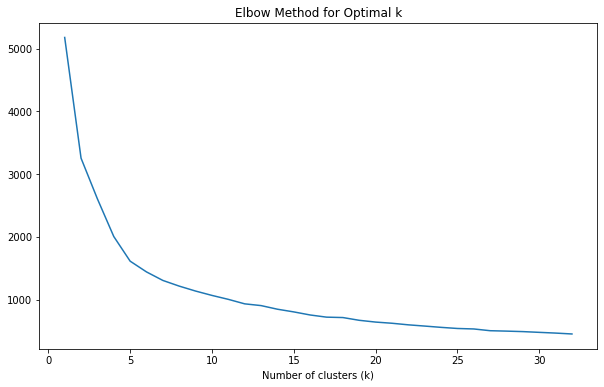

In [61]:
from sklearn.cluster import KMeans

scores = []
k_range = range(1, 33)
for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit_predict(ndata)
    scores.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, scores)
plt.xlabel('Number of clusters (k)')
plt.title('Elbow Method for Optimal k')
plt.show()


In [82]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
label = kmeans.fit_predict(ndata)
ndf['cluster'] = label

ndf

c:\users\kizar\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,External Critic Scores,Weighted IGDB User Rating,Weighted IGDB + External Rating,Units Shipped,Follows,cluster
id,,,,,,
1070,0.596331,4.500979,4.729848,1.633801,7.097393,1
1026,0.596331,4.471136,4.681037,-0.308197,5.836676,1
19560,3.675638,4.945641,4.542232,-0.750001,7.125101,1
1103,0.596331,4.367958,4.532257,-0.695383,3.218265,1
7346,3.941911,4.556024,4.500873,-0.661398,9.286329,1
...,...,...,...,...,...,...
26762,-2.983524,-2.400247,-2.212094,-0.427144,-0.383782,3
2607,-2.766830,-2.496376,-2.265739,-0.781559,-0.300658,3
2724,-1.213723,-0.911366,-2.296341,-0.695383,-0.245242,3


In [79]:
ndf["cluster"].value_counts()

4    632
3    191
0    173
1     27
2     13
Name: cluster, dtype: int64

In [68]:
name_id_map = df.set_index(df.index)['name'].to_dict()
publisher_id_map = df.set_index(df.index)['publisher'].to_dict()

In [84]:
ndf['name'] = ndf.index.map(name_id_map)
ndf['publisher'] = ndf.index.map(publisher_id_map)
columns = ['name','publisher', 'External Critic Scores', 'Weighted IGDB User Rating', 'Weighted IGDB + External Rating', 'Units Shipped', 'Follows','cluster']
cluster_df = ndf[columns]
cluster_df

,name,publisher,External Critic Scores,Weighted IGDB User Rating,Weighted IGDB + External Rating,Units Shipped,Follows,cluster
id,,,,,,,,
1070,Super Mario World,Nintendo,0.596331,4.500979,4.729848,1.633801,7.097393,1
1026,The Legend of Zelda: A Link to the Past,Nintendo,0.596331,4.471136,4.681037,-0.308197,5.836676,1
19560,God of War,Sony Interactive Entertainment,3.675638,4.945641,4.542232,-0.750001,7.125101,1
1103,Super Metroid,Nintendo,0.596331,4.367958,4.532257,-0.695383,3.218265,1
7346,The Legend of Zelda: Breath of the Wild,Nintendo,3.941911,4.556024,4.500873,-0.661398,9.286329,1
...,...,...,...,...,...,...,...,...
26762,1-2-Switch,Nintendo,-2.983524,-2.400247,-2.212094,-0.427144,-0.383782,3
2607,Sonic Lost World,Nintendo,-2.766830,-2.496376,-2.265739,-0.781559,-0.300658,3
2724,Pokémon XD: Gale of Darkness,Nintendo,-1.213723,-0.911366,-2.296341,-0.695383,-0.245242,3


In [97]:
quantitative_columns = ['External Critic Scores', 'Weighted IGDB User Rating', 'Weighted IGDB + External Rating', 'Units Shipped', 'Follows']
og_quantitatve = ['weighted_agg_rating', 'weighted_rating', 'weighted_total_rating', 'units_shipped', 'follows']
cluster_summary = ndf.groupby(['publisher', 'cluster'])[quantitative_columns].mean().reset_index()
cluster_summary

,publisher,cluster,External Critic Scores,Weighted IGDB User Rating,Weighted IGDB + External Rating,Units Shipped,Follows
0,Microsoft Studios,0,1.527755,0.969237,1.351189,-0.253556,0.602451
1,Microsoft Studios,1,1.982614,2.238809,2.328922,-0.009055,4.416638
2,Microsoft Studios,3,-1.654122,-0.488039,-0.845001,-0.186256,-0.018920
3,Microsoft Studios,4,0.180858,-0.379410,-0.240733,-0.222711,-0.131857
4,Nintendo,0,0.894184,1.318561,1.368185,0.109250,0.390286
5,Nintendo,1,1.213794,3.460251,3.597027,0.337113,4.470515
6,Nintendo,2,0.179030,0.213771,0.283781,7.118841,0.350481
7,Nintendo,3,-1.358490,-0.630697,-0.901469,-0.162525,-0.254865
8,Nintendo,4,0.070012,-0.329876,-0.267309,-0.117727,-0.291766
9,Sony Interactive Entertainment,0,1.411530,1.381614,1.464250,-0.195733,0.662498


In [91]:
df['cluster'] = cluster_df['cluster']
df

,Unnamed: 0,Unnamed: 0.1,name,publisher,genres,platforms,franchise,aggregated_rating,aggregated_rating_count,total_rating,...,follows,hypes,units_shipped,count_non_null,rating,rating_count,weighted_agg_rating,weighted_rating,weighted_total_rating,cluster
id,,,,,,,,,,,,,,,,,,,,,
1070,340,343,Super Mario World,Nintendo,"['Platform', 'Adventure']","['Wii', 'Super Nintendo Entertainment System',...",Mario Bros.,100.000000,1.0,96.413481,...,545.0,NaN,20610000.0,3,92.869452,1344.0,78.302786,91.745923,95.066205,1
1026,381,384,The Legend of Zelda: A Link to the Past,Nintendo,"['Puzzle', 'Role-playing (RPG)', 'Adventure']","['Wii', 'Super Nintendo Entertainment System',...",NaN,100.000000,1.0,96.329179,...,454.0,NaN,4610000.0,3,92.873651,1220.0,78.302786,91.643547,94.867532,1
19560,263,271,God of War,Sony Interactive Entertainment,"['Role-playing (RPG)', ""Hack and slash/Beat 'e...","['PC (Microsoft Windows)', 'PlayStation 4']",NaN,96.230769,30.0,95.213998,...,547.0,92.0,970000.0,4,94.136264,1906.0,92.581022,93.271355,94.302553,1
1103,385,388,Super Metroid,Nintendo,"['Shooter', 'Platform', 'Adventure']","['Wii', 'Super Nintendo Entertainment System',...",NaN,100.000000,1.0,96.662386,...,265.0,NaN,1420000.0,3,93.320836,723.0,78.302786,91.289589,94.261953,1
7346,87,88,The Legend of Zelda: Breath of the Wild,Nintendo,"['Role-playing (RPG)', 'Adventure']","['Wii U', 'Nintendo Switch']",NaN,97.592593,31.0,95.078649,...,703.0,142.0,1700000.0,4,92.778962,1809.0,93.815683,91.934757,94.134210,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26762,329,332,1-2-Switch,Nintendo,NaN,Nintendo Switch,NaN,53.666667,10.0,45.644590,...,5.0,1.0,3630000.0,4,37.622512,21.0,61.703594,68.070984,66.810489,3
2607,392,395,Sonic Lost World,Nintendo,"['Platform', 'Adventure']","['PC (Microsoft Windows)', 'Nintendo 3DS', 'Wi...",NaN,58.071429,16.0,54.539347,...,11.0,2.0,710000.0,4,51.007266,40.0,62.708368,67.741212,66.592138,3
2724,147,151,Pokémon XD: Gale of Darkness,Nintendo,"['Role-playing (RPG)', 'Strategy', 'Turn-based...",Nintendo GameCube,NaN,40.000000,1.0,55.226785,...,15.0,NaN,1420000.0,3,70.433432,64.0,69.909866,73.178653,66.467579,3


In [98]:
og_cluster_summary = df.groupby(['publisher', 'cluster'])[og_quantitatve].mean().reset_index()
og_cluster_summary

,publisher,cluster,weighted_agg_rating,weighted_rating,weighted_total_rating,units_shipped,follows
0,Microsoft Studios,0,82.621643,79.630139,81.314086,2.374286e+06,76.187500
1,Microsoft Studios,1,84.730748,83.985457,85.293742,7.000000e+06,351.500000
2,Microsoft Studios,3,67.867812,74.402588,72.374956,2.353750e+06,31.217391
3,Microsoft Studios,4,76.512826,74.755630,74.834502,2.320526e+06,21.886364
4,Nintendo,0,80.091703,80.828508,81.383262,8.276449e+06,60.873134
5,Nintendo,1,82.773904,88.175662,90.455297,9.926667e+06,355.388889
6,Nintendo,2,77.059612,77.038479,76.969423,6.580091e+07,58.000000
7,Nintendo,3,69.193287,73.801756,72.145114,4.471143e+06,9.073394
8,Nintendo,4,76.045001,75.099235,74.726326,4.888826e+06,8.633262
9,Sony Interactive Entertainment,0,83.064484,81.044814,81.774276,4.058333e+06,80.521739


In [100]:
winners = og_cluster_summary.groupby('publisher')[og_quantitatve].max().reset_index()
winners

,publisher,weighted_agg_rating,weighted_rating,weighted_total_rating,units_shipped,follows
0,Microsoft Studios,84.730748,83.985457,85.293742,7.000000e+06,351.500000
1,Nintendo,82.773904,88.175662,90.455297,6.580091e+07,355.388889
2,Sony Interactive Entertainment,86.220719,88.085669,88.149994,5.225000e+07,481.714286


In [103]:
top_games = 5
columns_to_check = og_quantitatve

for publisher in cluster_df['publisher'].unique():
    print(f"\n{publisher} Top 5 Games:")
    for column in columns_to_check:
        print(f"\nTop 5 {column}:")
        top_games_df = df[df['publisher'] == publisher].nlargest(top_games, column)
        print(top_games_df[['name', column]])



Nintendo Top 5 Games:

Top 5 weighted_agg_rating:
                                          name  weighted_agg_rating
id                                                                 
7346   The Legend of Zelda: Breath of the Wild            93.815683
26758                      Super Mario Odyssey            91.343588
2180                      Super Mario 3D World            88.610996
9602               Super Smash Bros. for Wii U            88.327760
1078                      Super Mario Galaxy 2            88.072807

Top 5 weighted_rating:
                                         name  weighted_rating
id                                                            
7346  The Legend of Zelda: Breath of the Wild        91.934757
1070                        Super Mario World        91.745923
1026  The Legend of Zelda: A Link to the Past        91.643547
1103                            Super Metroid        91.289589
1029     The Legend of Zelda: Ocarina of Time        91.133292

Top 5 w

In [108]:
for cluster in cluster_df['cluster'].unique():
    print(f"\nCluster {cluster} Top 5 Games:")
    for column in columns_to_check:
        print(f"\nTop 5 {column}:")
        top_games_df = df[df['cluster'] == cluster].nlargest(top_games, column)
        print(top_games_df[['name', column]])



Cluster 1 Top 5 Games:

Top 5 weighted_agg_rating:
                                          name  weighted_agg_rating
id                                                                 
7346   The Legend of Zelda: Breath of the Wild            93.815683
19560                               God of War            92.581022
26758                      Super Mario Odyssey            91.343588
26192                   The Last of Us Part II            89.985536
7331                Uncharted 4: A Thief's End            89.708170

Top 5 weighted_rating:
                                          name  weighted_rating
id                                                             
19560                               God of War        93.271355
7346   The Legend of Zelda: Breath of the Wild        91.934757
1070                         Super Mario World        91.745923
1026   The Legend of Zelda: A Link to the Past        91.643547
1103                             Super Metroid        91.289589
